# Práctica Calificada 02
## Predicción de tarifas de taxis

<span style="color:red">
Abrir el cuaderno en Google Colab y ejecutar las celdas nuevamente.
</span>.

In [1]:
from google.colab import drive
#drive.mount('/content/drive/')

In [2]:
drive.mount('/gdrive')
%cd /gdrive/MyDrive/
#%cd /gdrive/MyDrive/Data/PracticaCalificada2-CC421/
#%ls

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/.shortcut-targets-by-id/1qadxIJNju7teh1dDYzszHDJhP_ligzqQ/Data/PracticaCalificada2-CC421


In [3]:
import pandas as pd
import numpy as np

In [4]:
#np.set_printoptions(formatter={'float_kind':'{:f}'.format})

#### Importar data total

In [5]:
dtypes = {
      'key': 'object',
      'fare_amount': 'float64',
      'pickup_datetime': 'object',
      'pickup_longitude': 'float64', 
      'pickup_latitude': 'float64',
      'dropoff_longitude': 'float64',
      'dropoff_latitude': 'float64',
      'passenger_count': 'int64',
      
    
}
df = pd.read_csv("train.csv", dtype=dtypes, nrows=10000000)
df = df[['key', 'pickup_datetime', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 'passenger_count', 'fare_amount']]
df.head()

,key,pickup_datetime,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,passenger_count,fare_amount
0,2009-06-15 17:26:21.0000001,2009-06-15 17:26:21 UTC,40.721319,-73.844311,40.712278,-73.841610,1,4.5
1,2010-01-05 16:52:16.0000002,2010-01-05 16:52:16 UTC,40.711303,-74.016048,40.782004,-73.979268,1,16.9
2,2011-08-18 00:35:00.00000049,2011-08-18 00:35:00 UTC,40.761270,-73.982738,40.750562,-73.991242,2,5.7
3,2012-04-21 04:30:42.0000001,2012-04-21 04:30:42 UTC,40.733143,-73.987130,40.758092,-73.991567,1,7.7
4,2010-03-09 07:51:00.000000135,2010-03-09 07:51:00 UTC,40.768008,-73.968095,40.783762,-73.956655,1,5.3


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   key                object 
 1   pickup_datetime    object 
 2   pickup_latitude    float64
 3   pickup_longitude   float64
 4   dropoff_latitude   float64
 5   dropoff_longitude  float64
 6   passenger_count    int64  
 7   fare_amount        float64
dtypes: float64(5), int64(1), object(2)
memory usage: 610.4+ MB


### Primera revisión de la data completa

#### Valores duplicados

In [7]:
%time
duplicateRowsDF = df.loc[df.duplicated(['key'], keep=False), :]
duplicateRowsDF

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.96 µs


,key,pickup_datetime,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,passenger_count,fare_amount


In [8]:
df['key'][55423855] =  '2014-12-12 11:33:00.00000016'

In [9]:
duplicateRowsDF = df.loc[df.duplicated(['key'], keep=False), :]
duplicateRowsDF.shape[0]

0

#### Valores NaN

In [10]:
valores_nan = df.isna().sum()
valores_nan

key                   0
pickup_datetime       0
pickup_latitude       0
pickup_longitude      0
dropoff_latitude     69
dropoff_longitude    69
passenger_count       0
fare_amount           0
dtype: int64

In [11]:
df = df.dropna()

#### Coordenadas

Se analizará la data con el objetivo de eliminar las filas con coordenadas ubicadas en el océano.


In [12]:
!pip install global-land-mask

In [13]:
from global_land_mask import globe as gl

In [14]:
df.shape

(9999931, 8)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999931 entries, 0 to 9999999
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   key                object 
 1   pickup_datetime    object 
 2   pickup_latitude    float64
 3   pickup_longitude   float64
 4   dropoff_latitude   float64
 5   dropoff_longitude  float64
 6   passenger_count    int64  
 7   fare_amount        float64
dtypes: float64(5), int64(1), object(2)
memory usage: 686.6+ MB


In [16]:
df = df[df['pickup_latitude'].values > -90]
df = df[df['pickup_latitude'].values < 90]
df = df[df['dropoff_latitude'].values > -90]
df = df[df['dropoff_latitude'].values < 90]

df = df[df['pickup_longitude'].values > -180]
df = df[df['pickup_longitude'].values < 180]
df = df[df['dropoff_longitude'].values > -180]
df = df[df['dropoff_longitude'].values < 180]

In [17]:
pla = df[['pickup_latitude']].to_numpy()
plon = df[['pickup_longitude']].to_numpy()
dla = df[['dropoff_latitude']].to_numpy()
dlon = df[['dropoff_longitude']].to_numpy()

#gl.is_ocean(pla,plon)
#df.loc[gl.is_ocean(pla,plon), :]

df = df.drop(df.loc[gl.is_ocean(pla,plon)].index)

In [18]:
# dfs[['pickup_latitude', 'pickup_longitude']] = dfs.apply(lambda x: ocean_values_to_nan(x['pickup_latitude'],x['pickup_longitude']), axis=1 )
# dfs[['dropoff_latitude', 'dropoff_longitude']] = dfs.apply(lambda x: ocean_values_to_nan(x['dropoff_latitude'],x['dropoff_longitude']) , axis=1)

In [19]:
df.shape

(9785792, 8)

In [20]:
#df.to_csv('trainsampleprep.csv')

In [21]:
df.head(-15)

,key,pickup_datetime,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,passenger_count,fare_amount
0,2009-06-15 17:26:21.0000001,2009-06-15 17:26:21 UTC,40.721319,-73.844311,40.712278,-73.841610,1,4.5
1,2010-01-05 16:52:16.0000002,2010-01-05 16:52:16 UTC,40.711303,-74.016048,40.782004,-73.979268,1,16.9
2,2011-08-18 00:35:00.00000049,2011-08-18 00:35:00 UTC,40.761270,-73.982738,40.750562,-73.991242,2,5.7
3,2012-04-21 04:30:42.0000001,2012-04-21 04:30:42 UTC,40.733143,-73.987130,40.758092,-73.991567,1,7.7
4,2010-03-09 07:51:00.000000135,2010-03-09 07:51:00 UTC,40.768008,-73.968095,40.783762,-73.956655,1,5.3
...,...,...,...,...,...,...,...,...
9999980,2015-02-12 23:30:38.0000008,2015-02-12 23:30:38 UTC,40.761551,-73.974197,40.802128,-73.963242,1,14.5
9999981,2010-06-16 09:21:00.000000106,2010-06-16 09:21:00 UTC,40.632488,-73.696362,40.627288,-73.703765,1,4.9
9999982,2010-07-10 18:07:00.00000067,2010-07-10 18:07:00 UTC,40.791027,-73.947290,40.778013,-73.953898,2,4.9
9999983,2011-01-08 21:48:00.00000070,2011-01-08 21:48:00 UTC,40.750238,-73.991167,40.744720,-73.980848,1,5.7


#### Rango de valores

Ahora verificamos que los datos cumplan las restricciones de rango correspondientes.

In [22]:
df.describe()

,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,passenger_count,fare_amount
count,9.785792e+06,9.785792e+06,9.785792e+06,9.785792e+06,9.785792e+06,9.785792e+06
mean,4.069289e+01,-7.390777e+01,4.065839e+01,-7.384523e+01,1.684859e+00,1.132287e+01
std,2.571542e+00,2.705123e+00,2.832979e+00,3.445330e+00,1.313768e+00,9.724057e+00
min,-7.482416e+01,-1.219333e+02,-7.419320e+01,-1.733420e+02,0.000000e+00,-1.077500e+02
25%,4.073661e+01,-7.399222e+01,4.073551e+01,-7.399155e+01,1.000000e+00,6.000000e+00
50%,4.075341e+01,-7.398207e+01,4.075384e+01,-7.398056e+01,1.000000e+00,8.500000e+00
75%,4.076758e+01,-7.396825e+01,4.076840e+01,-7.396520e+01,2.000000e+00,1.250000e+01
max,8.154545e+01,7.393784e+01,8.154545e+01,7.393783e+01,2.080000e+02,9.520000e+02


Observamos que el mínimo valor de la columna de tarifa (fare_amount) es -30. Necesitamos que los valores de la tarifa sean valores mayores o iguales a 0.

In [23]:
df[df['fare_amount'] <= 0].count() /df.count()

key                  0.000066
pickup_datetime      0.000066
pickup_latitude      0.000066
pickup_longitude     0.000066
dropoff_latitude     0.000066
dropoff_longitude    0.000066
passenger_count      0.000066
fare_amount          0.000066
dtype: float64

In [24]:
df = df[df['fare_amount'] > 0]

También notamos valores atípicos en la cantidad de pasajeros, por ejemplo un viaje con 208 pasajeros. De acuerdo a las leyes de tránsito de Nueva York como máximo pueden haber 6 personas. Por lo tanto, las filas con cantidades de pasajeros mayores a 6 serán eliminadas.

In [25]:
( (df[df['passenger_count'] > 6].count() + df[df['passenger_count'] < 1.0].count()) / df.count() )* 100

key                  0.353546
pickup_datetime      0.353546
pickup_latitude      0.353546
pickup_longitude     0.353546
dropoff_latitude     0.353546
dropoff_longitude    0.353546
passenger_count      0.353546
fare_amount          0.353546
dtype: float64

In [26]:
df = df[df['passenger_count'] <= 6]
df = df[df['passenger_count'] >= 1.0]

In [27]:
df.describe()

,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,passenger_count,fare_amount
count,9.750554e+06,9.750554e+06,9.750554e+06,9.750554e+06,9.750554e+06,9.750554e+06
mean,4.069267e+01,-7.390753e+01,4.065880e+01,-7.384610e+01,1.690759e+00,1.133236e+01
std,2.576181e+00,2.710003e+00,2.832766e+00,3.437090e+00,1.306613e+00,9.732137e+00
min,-7.482416e+01,-1.219333e+02,-7.419320e+01,-1.733420e+02,1.000000e+00,1.000000e-02
25%,4.073661e+01,-7.399222e+01,4.073551e+01,-7.399155e+01,1.000000e+00,6.000000e+00
50%,4.075340e+01,-7.398207e+01,4.075384e+01,-7.398056e+01,1.000000e+00,8.500000e+00
75%,4.076758e+01,-7.396825e+01,4.076840e+01,-7.396519e+01,2.000000e+00,1.250000e+01
max,8.154545e+01,7.393784e+01,8.154545e+01,7.393783e+01,6.000000e+00,9.520000e+02


#### RANDOM FOREST

In [28]:
#df['day']=df['pickup_datetime'].apply(lambda x: pd.Timestamp(x).day_name())
#df['hour']=df['pickup_datetime'].apply(lambda x: pd.Timestamp(x).hour).apply(lambda x: 'manana' if x > 5 and x < 12 else 'Tarde' if x >=12 and x < 18 else 'noche')
#df.head()

In [29]:
from multiprocessing import Pool
def f(df):
  date = pd.to_datetime(df['pickup_datetime'])
  df['day']=date.dt.day_name()
  df['day_of_month'] = date.dt.day
  df['month'] = date.dt.month
  df['year'] = date.dt.year
  df['hour']=date.dt.hour.apply(lambda x: 'manana' if x > 5 and x < 12 else 'Tarde' if x >=12 and x < 18 else 'noche')

  return df

def parallelize_dataframe(df, func, n_cores=4):
    df_split = np.array_split(df, n_cores)
    pool = Pool(n_cores)
    df = pd.concat(pool.map(func, df_split))
    pool.close()
    pool.join()
    return df
df = parallelize_dataframe(df,f,n_cores=40)
#df = parallelize_dataframe(df,f2,n_cores=40)
df.head()



,key,pickup_datetime,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,passenger_count,fare_amount,day,day_of_month,month,year,hour
0,2009-06-15 17:26:21.0000001,2009-06-15 17:26:21 UTC,40.721319,-73.844311,40.712278,-73.841610,1,4.5,Monday,15,6,2009,Tarde
1,2010-01-05 16:52:16.0000002,2010-01-05 16:52:16 UTC,40.711303,-74.016048,40.782004,-73.979268,1,16.9,Tuesday,5,1,2010,Tarde
2,2011-08-18 00:35:00.00000049,2011-08-18 00:35:00 UTC,40.761270,-73.982738,40.750562,-73.991242,2,5.7,Thursday,18,8,2011,noche
3,2012-04-21 04:30:42.0000001,2012-04-21 04:30:42 UTC,40.733143,-73.987130,40.758092,-73.991567,1,7.7,Saturday,21,4,2012,noche
4,2010-03-09 07:51:00.000000135,2010-03-09 07:51:00 UTC,40.768008,-73.968095,40.783762,-73.956655,1,5.3,Tuesday,9,3,2010,manana


In [30]:
df_sub = pd.get_dummies(df[["day","hour"]])
df = df.drop(['day', 'hour'], axis=1)
df = pd.concat([df, df_sub], axis=1)

df.head()

,key,pickup_datetime,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,passenger_count,fare_amount,day_of_month,month,year,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,hour_Tarde,hour_manana,hour_noche
0,2009-06-15 17:26:21.0000001,2009-06-15 17:26:21 UTC,40.721319,-73.844311,40.712278,-73.841610,1,4.5,15,6,2009,0,1,0,0,0,0,0,1,0,0
1,2010-01-05 16:52:16.0000002,2010-01-05 16:52:16 UTC,40.711303,-74.016048,40.782004,-73.979268,1,16.9,5,1,2010,0,0,0,0,0,1,0,1,0,0
2,2011-08-18 00:35:00.00000049,2011-08-18 00:35:00 UTC,40.761270,-73.982738,40.750562,-73.991242,2,5.7,18,8,2011,0,0,0,0,1,0,0,0,0,1
3,2012-04-21 04:30:42.0000001,2012-04-21 04:30:42 UTC,40.733143,-73.987130,40.758092,-73.991567,1,7.7,21,4,2012,0,0,1,0,0,0,0,0,0,1
4,2010-03-09 07:51:00.000000135,2010-03-09 07:51:00 UTC,40.768008,-73.968095,40.783762,-73.956655,1,5.3,9,3,2010,0,0,0,0,0,1,0,0,1,0


In [31]:
data = df

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 975308 entries, 0 to 999999
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   key                975308 non-null  object 
 1   pickup_datetime    975308 non-null  object 
 2   pickup_latitude    975308 non-null  float64
 3   pickup_longitude   975308 non-null  float64
 4   dropoff_latitude   975308 non-null  float64
 5   dropoff_longitude  975308 non-null  float64
 6   passenger_count    975308 non-null  int64  
 7   fare_amount        975308 non-null  float64
 8   day_of_month       975308 non-null  int64  
 9   month              975308 non-null  int64  
 10  year               975308 non-null  int64  
 11  day_Friday         975308 non-null  uint8  
 12  day_Monday         975308 non-null  uint8  
 13  day_Saturday       975308 non-null  uint8  
 14  day_Sunday         975308 non-null  uint8  
 15  day_Thursday       975308 non-null  uint8  
 16  da

In [32]:
# Dividimos los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
# X son nuestras variables independientes
X = data.drop(["fare_amount","key","pickup_datetime"],axis = 1)

# y es nuestra variable dependiente
y = data['fare_amount'].values

# División 75% de datos para entrenamiento, 25% de daatos para test
#X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)
#tennisTrain, tennisTest, ObjTrain, ObjTest = train_test_split(Attr_tennis, Attr_obj,test_size=0.28, random_state=42)

fareTrain, fareTest, ObjTrain, ObjTest = train_test_split(X, y,test_size=0.3, random_state=42)
X.head(n = 5)


,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,passenger_count,day_of_month,month,year,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,hour_Tarde,hour_manana,hour_noche
0,40.721319,-73.844311,40.712278,-73.841610,1,15,6,2009,0,1,0,0,0,0,0,1,0,0
1,40.711303,-74.016048,40.782004,-73.979268,1,5,1,2010,0,0,0,0,0,1,0,1,0,0
2,40.761270,-73.982738,40.750562,-73.991242,2,18,8,2011,0,0,0,0,1,0,0,0,0,1
3,40.733143,-73.987130,40.758092,-73.991567,1,21,4,2012,0,0,1,0,0,0,0,0,0,1
4,40.768008,-73.968095,40.783762,-73.956655,1,9,3,2010,0,0,0,0,0,1,0,0,1,0


In [33]:
from sklearn.ensemble import RandomForestRegressor
BA_model = RandomForestRegressor(n_estimators = 100, 
                                  random_state = 1,max_depth = 8,n_jobs = 40)


In [34]:
BA_model.fit(fareTrain, ObjTrain)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=40, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [35]:
BA_model.score(fareTest, ObjTest)
print("Caracteristicas importantes:\n{}".format(BA_model.feature_importances_))
print("Exactitud:",BA_model.score(fareTest, ObjTest))


Caracteristicas importantes:
[8.00334756e-02 3.56868931e-01 9.61950309e-02 4.44042816e-01
 2.50452223e-04 1.54065681e-04 1.64621300e-04 2.16018035e-02
 2.89051122e-05 1.63987488e-05 1.82179075e-05 1.70336554e-05
 1.65361027e-05 1.33864977e-05 1.67981948e-05 2.82965469e-05
 2.82045575e-05 5.05026386e-04]
Exactitud: 0.7129811066047231


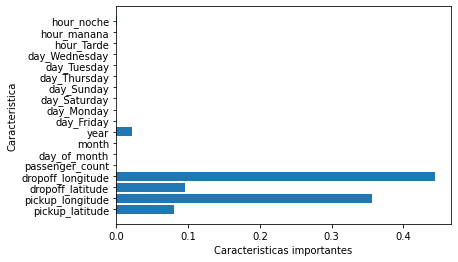

In [36]:
import matplotlib.pyplot as plt
def dibuja_caracteristicas_importantes_cancer(modelo):
    n_caracteristica = X.shape[1]
    plt.barh(range(n_caracteristica), modelo.feature_importances_, align='center')
    plt.yticks(np.arange(n_caracteristica),list(X.columns))
    plt.xlabel("Caracteristicas importantes")
    plt.ylabel("Caracteristica")

dibuja_caracteristicas_importantes_cancer(BA_model)

In [ ]:
import multiprocessing
multiprocessing.cpu_count()

#### Normalización

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dfn = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
dfn.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,0.096626,0.256750,0.094779,0.486964,0.509565,0.487987,0.520137,0.004808
1,0.095404,0.254083,0.093577,0.486967,0.509570,0.487992,0.520145,0.014423
2,0.193632,0.259417,0.189024,0.486962,0.509562,0.487989,0.520142,0.004808
3,0.841936,0.255000,0.810950,0.486965,0.509566,0.487990,0.520143,0.009615
4,0.384110,0.260083,0.370704,0.486959,0.509561,0.487990,0.520142,0.004808


In [ ]:
# dff = pd.DataFrame(af, columns = ['key','fare_amount','pickup_datetime','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count'])
# dff.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,0.096626,0.256750,0.094779,0.486964,0.509565,0.487987,0.520137,0.004808
1,0.095404,0.254083,0.093577,0.486967,0.509570,0.487992,0.520145,0.014423
2,0.193632,0.259417,0.189024,0.486962,0.509562,0.487989,0.520142,0.004808
3,0.841936,0.255000,0.810950,0.486965,0.509566,0.487990,0.520143,0.009615
4,0.384110,0.260083,0.370704,0.486959,0.509561,0.487990,0.520142,0.004808
